In [1]:

from pycaret.regression import * 
import pandas as pd

pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format


In [2]:

# 📥 1. Cargar y muestrear
df = pd.read_csv("datasetwg.csv")
df_sample = df.sample(frac=0.05, random_state=42).reset_index(drop=True)

# 🧹 2. Eliminar columnas con un solo valor (sin varianza)
for col in df_sample.columns:
    if df_sample[col].nunique() <= 1:
        df_sample.drop(columns=col, inplace=True)

# ❗ 3. Eliminar columnas no numéricas si el modelo es de regresión (opcional)
df_sample = df_sample.select_dtypes(include=["number"])

# 🎯 4. Definir variable objetivo
target = "tn"
if target not in df_sample.columns:
    raise ValueError("La columna 'tn' no está en el sample!")

# 💡 5. Eliminar filas con NaNs
df_sample = df_sample.dropna()


In [3]:

# 🔧 6. Setup PyCaret
setup(
    data=df_sample,
    target=target,
    session_id=42,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    use_gpu=False
)


,Description,Value
0,Session id,42
1,Target,tn
2,Target type,Regression
3,Original data shape,"(473049, 34)"
4,Transformed data shape,"(473049, 28)"
5,Transformed train set shape,"(331134, 28)"
6,Transformed test set shape,"(141915, 28)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


In [4]:
# ⚖️ 7. Comparar modelos
best_model = compare_models()

# 📊 8. Ver ranking
results = pull()
print(results)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0011,0.0016,0.0154,0.9990,0.0018,0.0894,1.1180
ridge,Ridge Regression,0.0011,0.0018,0.0175,0.9989,0.0018,0.0901,0.4830
par,Passive Aggressive Regressor,0.0220,0.0058,0.0473,0.9966,0.0253,2.5048,0.8820
huber,Huber Regressor,0.0025,0.0208,0.1258,0.9931,0.0094,0.0372,3.5660
omp,Orthogonal Matching Pursuit,0.0096,0.0460,0.1901,0.9855,0.0158,0.2073,0.6500
et,Extra Trees Regressor,0.0051,0.1010,0.2552,0.9776,0.0119,0.0064,36.3080
gbr,Gradient Boosting Regressor,0.0080,0.1211,0.2797,0.9724,0.0131,0.1227,26.2520
rf,Random Forest Regressor,0.0057,0.1696,0.3046,0.9642,0.0129,0.0066,93.5610
dt,Decision Tree Regressor,0.0063,0.1446,0.3239,0.9627,0.0171,0.0066,1.7220
ada,AdaBoost Regressor,0.1385,0.2701,0.5016,0.9183,0.1570,9.8281,8.7370


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

                                    Model   MAE        MSE   RMSE         R2  \
lr                      Linear Regression  0.00       0.00   0.02       1.00   
ridge                    Ridge Regression  0.00       0.00   0.02       1.00   
par          Passive Aggressive Regressor  0.02       0.01   0.05       1.00   
huber                     Huber Regressor  0.00       0.02   0.13       0.99   
omp           Orthogonal Matching Pursuit  0.01       0.05   0.19       0.99   
et                  Extra Trees Regressor  0.01       0.10   0.26       0.98   
gbr           Gradient Boosting Regressor  0.01       0.12   0.28       0.97   
rf                Random Forest Regressor  0.01       0.17   0.30       0.96   
dt                Decision Tree Regressor  0.01       0.14   0.32       0.96   
ada                    AdaBoost Regressor  0.14       0.27   0.50       0.92   
knn                 K Neighbors Regressor  0.05       0.39   0.58       0.89   
xgboost         Extreme Gradient Boostin

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0107,0.0151,0.1228,0.9907,0.0178,0.8944
2,0.0002,0.0009,0.0307,0.9996,0.0003,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0107,0.0151,0.1228,0.9907,0.0178,0.8944
2,0.0002,0.0009,0.0307,0.9996,0.0003,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Parameters
copy_X,True
fit_intercept,True
n_jobs,-1
positive,False


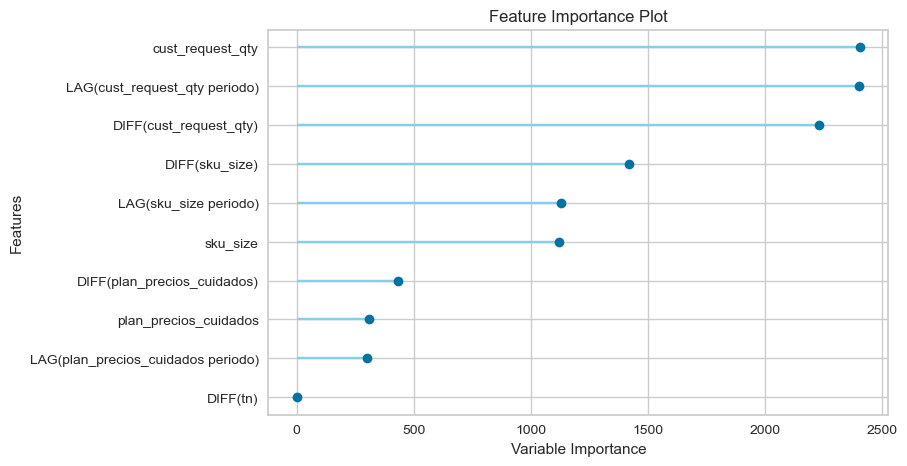

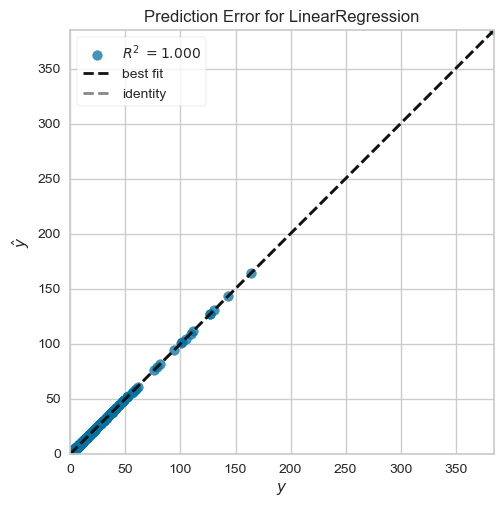

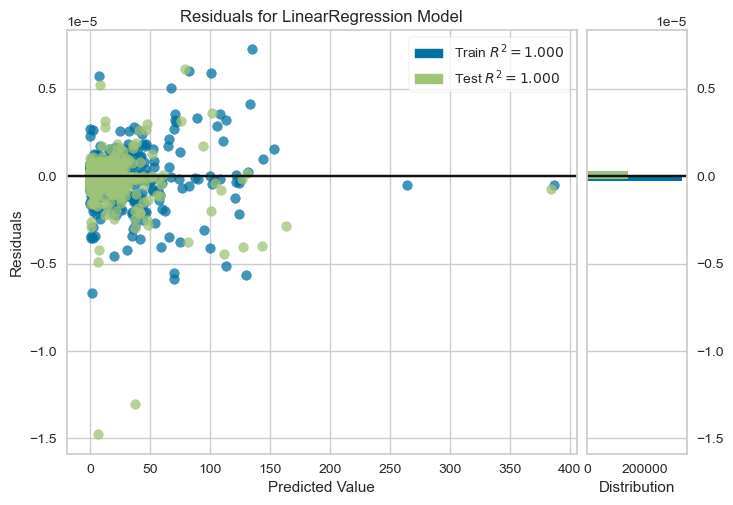

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,stock_final,sku_size,venta_id,DIFF(cust_request_qty),DIFF(cust_request_tn),...,"ROLLING_MEAN(periodo, stock_final)","ROLLING_MEAN(periodo, tn)",tn_lag_1,tn_lag_2,tn_lag_3,tn_lag_4,tn_lag_5,tn_delta,tn,prediction_label
249245,10037,20976,0.00,2.00,0.01,2.52,50,840336,2.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01
322032,10271,20555,0.00,0.00,0.00,0.00,6,5489505,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
376066,10090,20023,0.00,5.00,1.47,147.50,240,1960630,5.00,1.47,...,66.49,2.52,0.00,7.55,0.00,0.41,0.00,1.47,1.47,1.47
362810,10331,20213,0.00,0.00,0.00,0.00,930,6585933,0.00,0.00,...,5.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
97009,10056,20022,0.00,1.00,6.12,0.00,800,1216013,0.00,5.28,...,0.00,0.28,0.84,0.00,0.00,3.14,3.14,5.28,6.12,6.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165538,10366,20150,0.00,0.00,0.00,0.56,1400,7181351,0.00,0.00,...,11.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
387854,10016,20239,0.00,0.00,0.00,0.00,300,334153,-1.00,-0.01,...,0.00,0.01,0.01,0.00,0.01,0.00,0.26,-0.01,0.00,-0.00
443643,10125,20781,0.00,1.00,0.01,0.00,4,2748890,1.00,0.01,...,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01
90203,10176,20166,0.00,0.00,0.00,5.36,375,3712203,-1.00,-0.05,...,17.52,0.02,0.05,0.00,0.00,0.00,0.13,-0.05,0.00,0.00


In [6]:
# Entrenar modelo lineal
lr_model = create_model('lr')

# Tunear
tuned_lr_model = tune_model(lr_model)

# Plots
plot_model(lr_model, plot='parameter')
plot_model(lr_model, plot='feature')
plot_model(lr_model, plot='error')
plot_model(lr_model)
#interpret_model(lr_model)

# Predicción en holdout
predict_model(lr_model)


In [7]:

# Finalizar modelo y guardar
final_lr_model = finalize_model(lr_model)
predict_model(final_lr_model)

save_model(final_lr_model, '2_final_lr_model')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.8896,94.6339,9.7280,-25.5070,1.3828,422.8447


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['customer_id', 'product_id',
                                              'plan_precios_cuidados',
                                              'cust_request_qty',
                                              'cust_request_tn', 'stock_final',
                                              'sku_size', 'venta_id',
                                              'DIFF(cust_request_qty)',
                                              'DIFF(cust_request_tn)',
                                              'DIFF(plan_precios_cuidados)',
                                              'DIFF(sku_size)',
                                              'DIFF(stock_final)', 'DIFF(tn)',
                                              'LAG(...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_multicollinearity',
   

In [9]:

# Tomar sample sin eliminar columnas necesarias
df_pred = df.sample(n=100000, random_state=123).copy()

# Eliminar target si está presente
if 'tn' in df_pred.columns:
    df_pred = df_pred.drop(columns=['tn'])

# Hacer predicción
preds = predict_model(final_lr_model, data=df_pred)

# Ver qué columnas trae
print(preds.columns)
print(preds.head())



Index(['customer_id', 'product_id', 'periodo', 'plan_precios_cuidados',
       'cust_request_qty', 'cust_request_tn', 'stock_final', 'cat1', 'cat2',
       'cat3', 'brand', 'sku_size', 'venta_id', 'DIFF(cust_request_qty)',
       'DIFF(cust_request_tn)', 'DIFF(plan_precios_cuidados)',
       'DIFF(sku_size)', 'DIFF(stock_final)', 'DIFF(tn)',
       'LAG(brand, periodo)', 'LAG(cat1, periodo)', 'LAG(cat2, periodo)',
       'LAG(cat3, periodo)', 'LAG(cust_request_qty, periodo)',
       'LAG(cust_request_tn, periodo)', 'LAG(plan_precios_cuidados, periodo)',
       'LAG(sku_size, periodo)', 'LAG(stock_final, periodo)',
       'LAG(tn, periodo)', 'MONTH(periodo)',
       'ROLLING_MEAN(periodo, cust_request_qty)',
       'ROLLING_MEAN(periodo, cust_request_tn)',
       'ROLLING_MEAN(periodo, plan_precios_cuidados)',
       'ROLLING_MEAN(periodo, sku_size)', 'ROLLING_MEAN(periodo, stock_final)',
       'ROLLING_MEAN(periodo, tn)', 'tn_lag_1', 'tn_lag_2', 'tn_lag_3',
       'tn_lag_4', 'tn_lag_

In [17]:
import pandas as pd
from pycaret.regression import *

# 1. Cargar el dataset completo
df = pd.read_csv("datasetwg.csv")

# 2. Filtrar datos de entrenamiento (hasta diciembre 2019)
df_train = df[df['periodo'] <= '2019-12-01'].copy()

# 3. Crear un dataframe con los product_id para febrero 2020 (sin datos)
df_pred = df[['product_id']].drop_duplicates().copy()
df_pred['periodo'] = '2020-02-01'

# 4. Agregar columnas faltantes con None (excepto 'tn')
cols_faltantes = [col for col in df_train.columns if col not in df_pred.columns and col != 'tn']
for col in cols_faltantes:
    df_pred[col] = None

# 5. Reordenar columnas igual que df_train
df_pred = df_pred[df_train.drop(columns='tn').columns]

# 6. Setup en PyCaret sin silent
reg = setup(
    data=df_train,
    target='tn',
    session_id=123,
    verbose=False
)

# 7. Entrenar modelo base
lr_model = create_model('lr')
final_lr_model = finalize_model(lr_model)

# 8. Predecir sobre febrero 2020
preds = predict_model(final_lr_model, data=df_pred)

# 9. Guardar resultados
resultado = preds[['product_id', 'prediction_label']].rename(columns={'prediction_label': 'tn_predicho'})

resultado.to_csv("predicciones_febrero2020_pycaret.csv", index=False)

print("✅ CSV generado: predicciones_febrero2020_pycaret.csv")


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
1,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
2,0.2115,2.9365,1.7136,-0.0000,0.2342,12.8729
3,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
4,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
5,0.2075,2.7251,1.6508,-0.0000,0.2321,12.9767
6,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
7,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
8,0.2076,2.4338,1.5601,-0.0000,0.2323,12.9323


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

✅ CSV generado: predicciones_febrero2020_pycaret.csv


In [18]:
salida=pd.read_csv("predicciones_febrero2020_pycaret.csv")
print(salida.head())

   product_id  tn_predicho
0       20001         0.12
1       20002         0.12
2       20003         0.12
3       20004         0.12
4       20005         0.12


In [2]:
import pandas as pd
from pycaret.regression import *

# 1. Cargar el dataset completo
df = pd.read_csv("datasetwg.csv")
df['periodo'] = pd.to_datetime(df['periodo'])

# 2. Filtrar datos de entrenamiento (hasta diciembre 2019)
df_train = df[df['periodo'] <= '2019-12-01'].copy()

# 3. Obtener los product_id únicos de febrero 2020
productos_feb = df[df['periodo'] == '2020-02-01']['product_id'].unique()

# 4. Buscar la última fila conocida por producto hasta dic-2019
df_ultimos = (
    df_train[df_train['product_id'].isin(productos_feb)]
    .sort_values(['product_id', 'periodo'])
    .groupby('product_id')
    .tail(1)
    .copy()
)

# 5. Reemplazar el periodo por '2020-02-01'
df_pred = df_ultimos.copy()
df_pred['periodo'] = pd.to_datetime('2020-02-01')

# 6. Eliminar columna target si existe
if 'tn' in df_pred.columns:
    df_pred = df_pred.drop(columns=['tn'])

# 7. Setup de PyCaret
reg = setup(data=df_train, target='tn', session_id=123, verbose=False)




In [ ]:
# ⚖️ 7. Comparar modelos
best_model = compare_models()

# 📊 8. Ver ranking
results = pull()
print(results)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:32:14
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.0625,0.8268,0.4980,-0.0000,0.0697,3.8649,24.5010
en,Elastic Net,0.0421,0.5669,0.3367,-0.0000,0.0467,2.5778,27.4860
omp,Orthogonal Matching Pursuit,0.0628,0.8819,0.5139,-0.0000,0.0698,3.8525,25.1980
br,Bayesian Ridge,0.0421,0.5669,0.3367,-0.0000,0.0467,2.5767,37.7790
par,Passive Aggressive Regressor,0.0715,0.8530,0.5058,-0.0066,0.0753,4.5029,42.6440
lar,Least Angle Regression,2553436622416.7168,1603248047597795252717486080.0000,12662571546142.1738,-586721257754970083213443072.0000,8.1722,301200258470943.9375,25.8520


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# 8. Entrenar modelo base
lr_model = create_model('lr')
final_lr_model = finalize_model(lr_model)

# 9. Predecir sobre df_pred
preds = predict_model(final_lr_model, data=df_pred)

# 10. Armar resultados finales
resultado = preds[['product_id', 'prediction_label']].rename(columns={'prediction_label': 'tn_predicho'})

# 11. Exportar
resultado.to_csv("predicciones_pycaret_reales.csv", index=False)
print("✅ Predicciones exportadas: predicciones_pycaret_reales.csv")